In [1]:
!pip install opencv-python pandas numpy scikit-learn seaborn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preprocessing

## Building the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import os

folder_path = '/content/drive/MyDrive/ISPR/assignment_1'

rows = []

for filename in os.listdir(folder_path):
  if 'GT' not in filename and filename.split('.')[1] == 'bmp':
    rows.append({'filename': filename,
     'filepath': os.path.join(folder_path, filename),
     'class': filename.split('_')[0]})

df = pd.DataFrame(rows)

In [4]:
df.head()

,filename,filepath,class
0,1_18_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/1_18_...,1
1,1_21_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/1_21_...,1
2,1_11_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/1_11_...,1
3,1_22_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/1_22_...,1
4,1_1_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/1_1_s...,1


In [5]:
df['class'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8'], dtype=object)

In [6]:
df.to_csv(os.path.join(folder_path, 'filepath_dataframe.csv'))

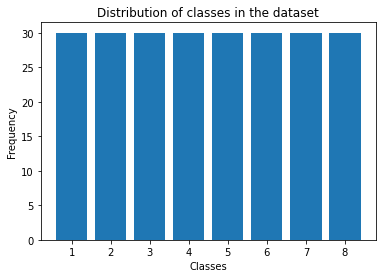

In [7]:
import matplotlib.pyplot as plt

classes = df['class'].value_counts()

plt.bar(classes.index, classes.values)
plt.title('Distribution of classes in the dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [8]:
choosen_class = ["3", "5", "6", "7"]

mask = df['class'].isin(choosen_class)
df = df[mask].dropna()
print(len(df))

df.head()

120


,filename,filepath,class
50,3_11_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3
54,3_13_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_13_...,3
56,3_14_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_14_...,3
58,3_16_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_16_...,3
62,3_15_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_15_...,3


In [9]:
df.to_csv(os.path.join(folder_path, 'filepath_dataframe_filtered.csv'))

# Extracting Sift Descriptors

In [10]:
import cv2 as cv
import numpy as np

In [11]:
def get_sift(filepath):
  img = cv.imread(filepath)
  gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  sift = cv.SIFT_create()
  kp = sift.detect(gray,None)
  kp, des = sift.compute(gray, kp)
  return des

In [12]:
df['descriptor'] = df["filepath"].apply(get_sift)

In [13]:
df

,filename,filepath,class,descriptor
50,3_11_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3,"[[3.0, 3.0, 5.0, 57.0, 116.0, 8.0, 1.0, 4.0, 6..."
54,3_13_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_13_...,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
56,3_14_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_14_...,3,"[[118.0, 99.0, 20.0, 56.0, 39.0, 6.0, 13.0, 17..."
58,3_16_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_16_...,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.0..."
62,3_15_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/3_15_...,3,"[[6.0, 12.0, 24.0, 31.0, 112.0, 22.0, 8.0, 25...."
...,...,...,...,...
205,7_24_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/7_24_...,7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 6.0,..."
206,7_30_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/7_30_...,7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.0, 42.0, 43..."
207,7_7_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/7_7_s...,7,"[[4.0, 0.0, 0.0, 2.0, 2.0, 3.0, 3.0, 1.0, 132...."
210,7_9_s.bmp,/content/drive/MyDrive/ISPR/assignment_1/7_9_s...,7,"[[24.0, 56.0, 35.0, 43.0, 51.0, 18.0, 6.0, 24...."


In [14]:
rows = []
for index, row in df.iterrows():
    for matrix_row in row['descriptor']:
        info_row = list(matrix_row) + [row['class'], row['filepath'], row['filename']]
        rows.append(info_row)

# Create a DataFrame from the list of rows
descriptor_df = pd.DataFrame(rows, columns=[f'col_{i}' for i in range(1, 129)] + ['class', 'filepath', 'filename'])

In [15]:
descriptor_df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_122,col_123,col_124,col_125,col_126,col_127,col_128,class,filepath,filename
0,3.0,3.0,5.0,57.0,116.0,8.0,1.0,4.0,69.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
1,3.0,2.0,4.0,5.0,7.0,5.0,4.0,1.0,10.0,3.0,...,27.0,13.0,2.0,5.0,10.0,26.0,39.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,37.0,...,45.0,9.0,3.0,68.0,57.0,3.0,9.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
3,2.0,6.0,20.0,48.0,25.0,19.0,16.0,15.0,17.0,7.0,...,7.0,13.0,19.0,23.0,1.0,0.0,1.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
4,9.0,12.0,3.0,28.0,50.0,14.0,0.0,0.0,140.0,93.0,...,3.0,0.0,2.0,7.0,1.0,0.0,44.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52350,1.0,0.0,0.0,1.0,37.0,2.0,0.0,0.0,28.0,3.0,...,2.0,1.0,1.0,34.0,16.0,1.0,14.0,7,/content/drive/MyDrive/ISPR/assignment_1/7_8_s...,7_8_s.bmp
52351,65.0,32.0,2.0,7.0,31.0,2.0,0.0,1.0,53.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,/content/drive/MyDrive/ISPR/assignment_1/7_8_s...,7_8_s.bmp
52352,144.0,3.0,2.0,1.0,1.0,0.0,0.0,84.0,144.0,80.0,...,5.0,1.0,12.0,37.0,1.0,0.0,4.0,7,/content/drive/MyDrive/ISPR/assignment_1/7_8_s...,7_8_s.bmp
52353,177.0,50.0,29.0,1.0,1.0,0.0,0.0,32.0,116.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,/content/drive/MyDrive/ISPR/assignment_1/7_8_s...,7_8_s.bmp


In [16]:
descriptor_df.to_csv(os.path.join(folder_path, 'descriptor_dataset_3_5_6_7.csv'))

# Running K-Means

In [5]:
descriptor_df = pd.read_csv(os.path.join(folder_path, 'descriptor_dataset_3_5_6_7.csv'), index_col=0)

In [6]:
descriptor_df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_122,col_123,col_124,col_125,col_126,col_127,col_128,class,filepath,filename
0,3.0,3.0,5.0,57.0,116.0,8.0,1.0,4.0,69.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
1,3.0,2.0,4.0,5.0,7.0,5.0,4.0,1.0,10.0,3.0,...,27.0,13.0,2.0,5.0,10.0,26.0,39.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,37.0,...,45.0,9.0,3.0,68.0,57.0,3.0,9.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
3,2.0,6.0,20.0,48.0,25.0,19.0,16.0,15.0,17.0,7.0,...,7.0,13.0,19.0,23.0,1.0,0.0,1.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
4,9.0,12.0,3.0,28.0,50.0,14.0,0.0,0.0,140.0,93.0,...,3.0,0.0,2.0,7.0,1.0,0.0,44.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
data_subset = descriptor_df.iloc[:, :128]

In [19]:
#defining the optimal value of k clusters


ks = range(2, 10)

silhouette_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_subset)
    score = silhouette_score(data_subset, kmeans.labels_)
    silhouette_scores.append(score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

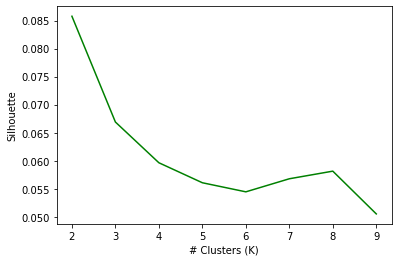

In [20]:
# plotta il valore del silhouette score per ogni valore di K
plt.plot(ks, silhouette_scores, color='green')
plt.xlabel('# Clusters (K)')
plt.ylabel('Silhouette')
#plt.title('Valutazione del Numero di Cluster con Silhouette Score')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_subset)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# ottenimento dei centroidi dei cluster
centroids = kmeans.cluster_centers_
# ottenimento delle etichette dei cluster per ogni osservazione
labels = kmeans.predict(data_subset)

In [13]:
labels
#cluster_labels

array([4, 4, 4, ..., 4, 1, 2], dtype=int32)

In [17]:
cluster_labels
descriptor_df ["Cluster"] = cluster_labels

In [15]:
descriptor_df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_122,col_123,col_124,col_125,col_126,col_127,col_128,class,filepath,filename
0,3.0,3.0,5.0,57.0,116.0,8.0,1.0,4.0,69.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
1,3.0,2.0,4.0,5.0,7.0,5.0,4.0,1.0,10.0,3.0,...,27.0,13.0,2.0,5.0,10.0,26.0,39.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,37.0,...,45.0,9.0,3.0,68.0,57.0,3.0,9.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
3,2.0,6.0,20.0,48.0,25.0,19.0,16.0,15.0,17.0,7.0,...,7.0,13.0,19.0,23.0,1.0,0.0,1.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
4,9.0,12.0,3.0,28.0,50.0,14.0,0.0,0.0,140.0,93.0,...,3.0,0.0,2.0,7.0,1.0,0.0,44.0,3,/content/drive/MyDrive/ISPR/assignment_1/3_11_...,3_11_s.bmp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52350,1.0,0.0,0.0,1.0,37.0,2.0,0.0,0.0,28.0,3.0,...,2.0,1.0,1.0,34.0,16.0,1.0,14.0,7,/content/drive/MyDrive/ISPR/assignment_1/7_8_s...,7_8_s.bmp
52351,65.0,32.0,2.0,7.0,31.0,2.0,0.0,1.0,53.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,/content/drive/MyDrive/ISPR/assignment_1/7_8_s...,7_8_s.bmp
52352,144.0,3.0,2.0,1.0,1.0,0.0,0.0,84.0,144.0,80.0,...,5.0,1.0,12.0,37.0,1.0,0.0,4.0,7,/content/drive/MyDrive/ISPR/assignment_1/7_8_s...,7_8_s.bmp
52353,177.0,50.0,29.0,1.0,1.0,0.0,0.0,32.0,116.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,/content/drive/MyDrive/ISPR/assignment_1/7_8_s...,7_8_s.bmp


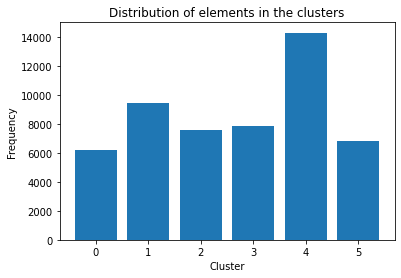

In [18]:
clusters_el = descriptor_df['Cluster'].value_counts()

plt.bar(clusters_el.index, clusters_el.values)
plt.title('Distribution of elements in the clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()



#df = sns.load_dataset("penguins")


<Axes: >

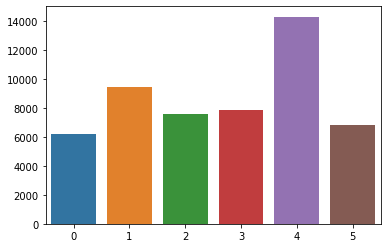

In [19]:
import seaborn as sns
sns.barplot( x=clusters_el.index, y=clusters_el.values)

In [20]:
# conta il numero di elementi per ogni categoria e cluster
count_df = descriptor_df.groupby(['Cluster', 'class'])['class'].count().unstack().fillna(0)


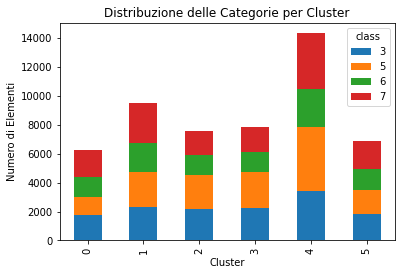

In [21]:
# crea un bar plot che mostra la distribuzione delle categorie per ogni cluster
count_df.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Numero di Elementi')
plt.title('Distribuzione delle Categorie per Cluster')
plt.show()

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Creazione di un dataset di esempio
#X = np.array([[1, 2], [1.5, 1.8], [3, 4], [4, 3], [3.5, 3]])

# Creazione di un linkage matrix con il metodo ward
Z = linkage(data_subset, 'ward')

# Creazione del dendrogramma
plt.figure(figsize=(10, 5))
plt.title('Dendrogramma')
plt.xlabel('Indici dei campioni')
plt.ylabel('Distanza Euclidea')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_samples

# X è la matrice di dati, labels sono le etichette dei cluster assegnati a ogni campione
silhouette_values = silhouette_samples(data_subset, cluster_labels)

print("Silhouette values:", silhouette_values)

In [ ]:
import matplotlib.cm as cm

# Calcola il valore medio di silhouette per ogni cluster
cluster_silhouette_means = []
for i in np.unique(cluster_labels):
    cluster_silhouette_means.append(np.mean(silhouette_values[cluster_labels == i]))

# Crea un grafico a barre dei valori di silhouette per ogni campione
fig, ax = plt.subplots()
y_lower = 0
for i in np.unique(cluster_labels):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / len(np.unique(cluster_labels)))
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples

# Aggiunge una linea verticale per indicare il valore medio di silhouette su tutti i campioni
ax.axvline(x=np.mean(silhouette_values), color="red", linestyle="--")

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
y_cluster = descriptor_df['Cluster'].values
y_classe = descriptor_df['class'].values 
cm = confusion_matrix(y_classe, y_cluster)
print(cm)


In [ ]:
descriptor_df['class'].unique() 

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_cluster = descriptor_df['Cluster'].values
y_classe = descriptor_df['class'].values
cm = confusion_matrix(y_classe, y_cluster)

In [ ]:
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=descriptor_df['Cluster'].unique(),
            yticklabels=descriptor_df['class'].unique(),
            cbar=False,
            mask=cm == 0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()